## Modelo de recomendação Amazon

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

# reviews = pd.read_json('Automotive_5.json', lines = True)
reviews = pd.read_json('AMAZON_FASHION_5.json', lines = True)
display(reviews.head(15))

# reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
# asin - ID of the product, e.g. 0000013714
# reviewerName - name of the reviewer
# vote - helpful votes of the review
# style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
# reviewText - text of the review
# overall - rating of the product
# summary - summary of the review
# unixReviewTime - time of the review (unix time)
# reviewTime - time of the review (raw)
# image - images that users post after they have received the product

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Orange'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
1,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Black (3746...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
2,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Gray L...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
3,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue (37867...",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
4,5,True,"09 4, 2015",ALJ66O1Y6SLHA,B000K2PJ4K,"{'Size:': ' Big Boys', 'Color:': ' Blue/Pink'}",Tonya B.,Great product and price!,Five Stars,1441324800,NaN,NaN
5,3,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' White/Bl...",NaeNae,Waaay too small. Will use for futur children!,Oops!,1430870400,NaN,NaN
6,5,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Blue/Ora...",NaeNae,Stays vibrant after many washes,Great,1430870400,NaN,NaN
7,5,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Blue (37...",NaeNae,Stays vibrant after many washes,Good,1430870400,NaN,NaN
8,5,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Blue/Pink'}",NaeNae,My son really likes the pink. Ones which I was...,Great,1430870400,NaN,NaN
9,3,True,"05 6, 2015",A3W11493KS6Z2L,B000K2PJ4K,"{'Size:': ' Little Boys', 'Color:': ' Light Bl...",NaeNae,Waaay too small. Will use for future child.,Oops!,1430870400,NaN,NaN


In [16]:
reviews.shape

(3176, 12)

In [17]:
print('Colunas com valores null: \n',reviews.isnull().sum())

Colunas com valores null: 
 overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style               69
reviewerName         0
reviewText          16
summary              0
unixReviewTime       0
vote              2879
image             3070
dtype: int64


In [18]:
reviews.describe()

,overall,unixReviewTime,vote
count,3176.000000,3176.000000,297.000000
mean,4.404282,1492210809.068010,5.858586
std,1.034964,23967880.580666,6.317624
min,1.000000,1261699200.000000,2.000000
25%,4.000000,1479859200.000000,2.000000
50%,5.000000,1492560000.000000,3.000000
75%,5.000000,1508803200.000000,7.000000
max,5.000000,1530748800.000000,35.000000


In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         3176 non-null   int64  
 1   verified        3176 non-null   bool   
 2   reviewTime      3176 non-null   object 
 3   reviewerID      3176 non-null   object 
 4   asin            3176 non-null   object 
 5   style           3107 non-null   object 
 6   reviewerName    3176 non-null   object 
 7   reviewText      3160 non-null   object 
 8   summary         3176 non-null   object 
 9   unixReviewTime  3176 non-null   int64  
 10  vote            297 non-null    float64
 11  image           106 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 276.2+ KB


#### vendo informacoes de total de usuarios, produtos

In [20]:
print('usuarios: ', reviews['reviewerID'].nunique())
print('produtos: ', reviews['asin'].nunique())

usuarios:  406
produtos:  31


#### tirando informacoes que nao vao ser uteis

In [21]:
reviews.drop(['reviewerName', 'reviewTime', 'unixReviewTime', 'style', 'verified', 'image' ], axis=1, inplace=True)

#### destribuição de avaliações por produto

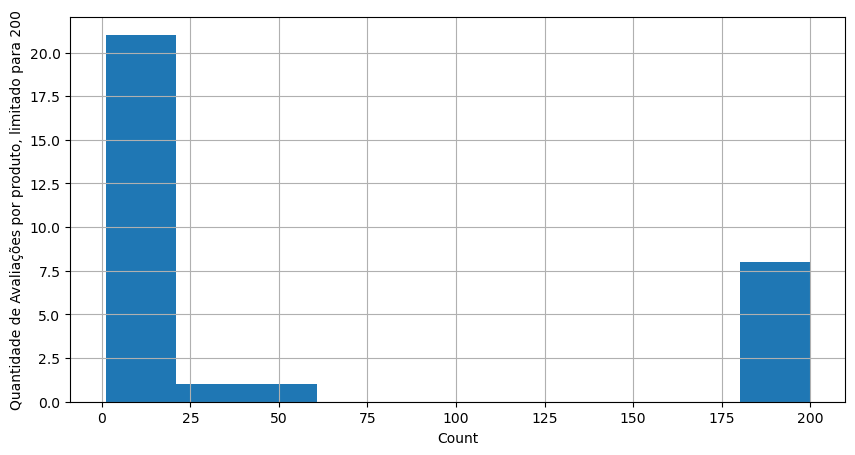

In [22]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import math

distribution = reviews.groupby('asin')['overall'].count().clip(upper=200)
distribution.hist(figsize=(10,5))
plt.ylabel("Quantidade de Avaliações por produto, limitado para 200")
plt.xlabel("Count")
plt.show()

#### pegando a media da avaliacao e a quantidade de vezes que cada produto aparece

##### vamos usar esse dfMerged para juntar todos os reviews de cada produto, assim podemos identificar todas as palavras do review de cada produto (isso ta mais na frente no KNN)

In [23]:
count = reviews.groupby("asin", as_index=False).count()
mean = reviews.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(reviews, count, how='right', on=['asin'])
dfMerged = pd.merge(dfMerged, mean, how='right', on=['asin'])
dfMerged


,overall_x,reviewerID_x,asin,reviewText_x,summary_x,vote_x,overall_y,reviewerID_y,reviewText_y,summary_y,vote_y,overall,vote
0,5,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,NaN,10,10,10,10,0,4.600000,NaN
1,5,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,NaN,10,10,10,10,0,4.600000,NaN
2,5,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,NaN,10,10,10,10,0,4.600000,NaN
3,5,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,NaN,10,10,10,10,0,4.600000,NaN
4,5,ALJ66O1Y6SLHA,B000K2PJ4K,Great product and price!,Five Stars,NaN,10,10,10,10,0,4.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3171,3,A4M7JTCBXRAT3,B014IBJKNO,This is a shoe I will wear with black dress pa...,"LOOKS GOOD, FEELS ICKY!",2.000000,375,375,373,375,39,4.442667,5.410256
3172,5,A2TRI54C8EMCX,B014IBJKNO,Love it!! Super comfortable and nice!! Got mor...,Love it!! Definetly recommend it,NaN,375,375,373,375,39,4.442667,5.410256
3173,5,AGZ5OOZVDO194,B01595OS62,Very comfortable and fits perfectly,Five Stars,NaN,1,1,1,1,0,5.000000,NaN
3174,5,A3VGHF7VNFBMCQ,B016XAJLVO,Super.,Five Stars,NaN,1,1,1,1,0,5.000000,NaN


#### Separando apenas o codigo do produto a media da nota e quantidade de reviews, vai ser usado no SVD

In [24]:
data = dfMerged[['asin', 'overall', 'reviewerID_y', 'summary_x']]

data = data.rename(columns={'reviewerID_y': 'reviewsCount', 'summary_x': 'summary', 'overall': 'rating'})

data.drop(['summary' ], axis=1, inplace=True)

data = data.drop_duplicates(subset=['asin'], keep='first')

data.reset_index()

data

,asin,rating,reviewsCount
0,B000K2PJ4K,4.600000,10
10,B000KPIHQ4,4.142857,7
17,B000V0IBDM,4.142857,7
24,B000YFSR4W,3.611111,36
60,B000YFSR5G,3.678571,56
116,B0012DR1LU,5.000000,4
120,B0014F7B98,4.438503,374
494,B0014F8TIU,2.750000,8
502,B0014HA6VG,4.500000,4
506,B0017LD0BM,3.200000,10


#### Distribuição das avaliações 

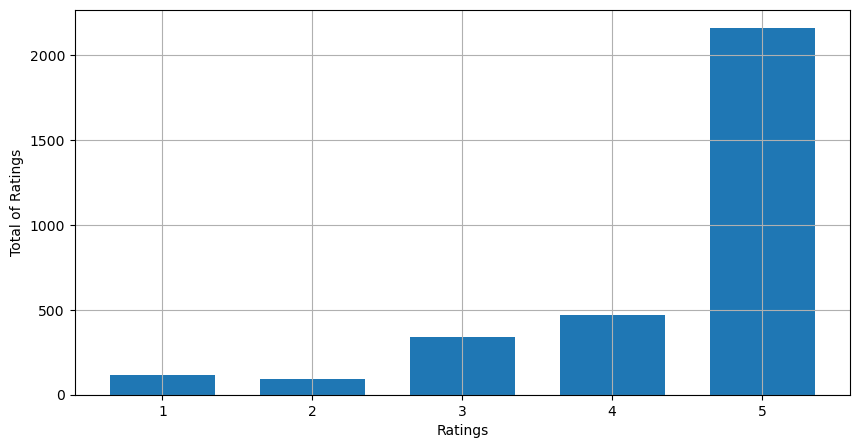

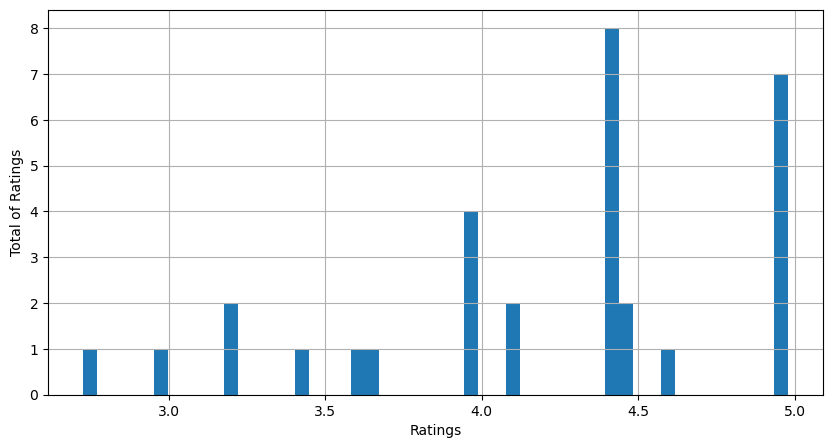

In [25]:
# antes do merge
reviews['overall'].hist(bins=range(1,7), figsize=(10,5),  align='left', rwidth=0.7)
plt.ylabel("Total of Ratings")
plt.xlabel("Ratings")
plt.show()


# depois do merge
data['rating'].hist(bins=50, figsize=(10,5),  align='left')
plt.ylabel("Total of Ratings")
plt.xlabel("Ratings")
plt.show()

#### Existem varios metodos de recomendacao popularidade, nota, similaridade, etc entao vamos selecionar algumas e analisar

#### 1. Utilizando SVD para analise

In [26]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(reviews[['reviewerID', 'asin', 'overall']], test_size=0.25)
print("train size: ", train_data.shape)
print("test size: ", test_data.shape)

train size:  (2382, 3)
test size:  (794, 3)


#### Utilizando a biblioteca scikit-surprise

In [27]:
# pip install scikit-surprise
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import cross_validate

algo = SVD()
reader = Reader(rating_scale=(1, 5))

data_train = Dataset.load_from_df(train_data, reader=reader)
data_test = Dataset.load_from_df(test_data, reader=reader)

# dataset = Dataset.load_from_df(data, reader=reader)
# cross_validate(algo, dataset, measures=['RMSE', 'MAE'], cv=5, verbose=True)

ModuleNotFoundError: No module named 'surprise'

In [ ]:
data_train = data_train.build_full_trainset()
data_test = data_test.build_full_trainset()

#### Comparando os valores do train e test

In [ ]:
mean = data_train.global_mean
print('Train rating', mean)

Train rating 4.458614143072936


In [ ]:
mean = data_test.global_mean
print('Test rating', mean)

Test rating 4.462781621015238


In [ ]:
data_trainset = data_train.build_testset()
data_testset = data_test.build_testset()

In [ ]:
algo = SVD(n_factors=5)
algo.fit(data_train)

#### RMSE do train e test

In [ ]:
train_pred = algo.test(data_trainset)
accuracy.rmse(train_pred)

RMSE: 0.8585


0.8585332930470158

In [ ]:
test_pred = algo.test(data_testset)
accuracy.mse(test_pred)

MSE: 0.9368


0.9367803107582499

In [ ]:
# uid = user id
# iid = item id
# r_ui = rating
predict = algo.predict(uid=reviews['reviewerID'][0], iid=reviews['asin'][0], r_ui=reviews['overall'][0], verbose = True)

user: A8WEXFRWX1ZHH item: 0209688726 r_ui = 4.00   est = 3.76   {'was_impossible': False}


#### 2. KNN - Utilizando palavras para recomendacao

#### tratando os textos para depois realizar o knn

In [29]:
dfMerged

dfNew = dfMerged[['asin','summary_x','overall',"overall_y"]]
dfNew = dfNew.rename(columns={'overall_y': 'reviewsCount', 'summary_x': 'summary', 'overall': 'rating'})

# selecionado apenas acima de 100 reviews
dfNew = dfNew[dfNew.reviewsCount >= 100]

dfNew

,asin,summary,rating,reviewsCount
120,B0014F7B98,Love them! So light feeling,4.438503,374
121,B0014F7B98,Five Stars,4.438503,374
122,B0014F7B98,you feel like you have a lot of room,4.438503,374
123,B0014F7B98,Exactly What I Was Looking For,4.438503,374
124,B0014F7B98,Five Stars,4.438503,374
...,...,...,...,...
3168,B014IBJKNO,Four Stars,4.442667,375
3169,B014IBJKNO,Four Stars,4.442667,375
3170,B014IBJKNO,Five Stars,4.442667,375
3171,B014IBJKNO,"LOOKS GOOD, FEELS ICKY!",4.442667,375


In [30]:
dfProductReview = reviews.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfNew.groupby("asin")["summary"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)

ProductReviewSummary

,summary
asin,
B0014F7B98,"[Love them! So light feeling, Five Stars, you ..."
B001IKJOLW,"[Four Stars, Five Stars, LOOKS GOOD, FEELS ICK..."
B0058YEJ5K,"[Four Stars, Four Stars, Five Stars, LOOKS GOO..."
B005AGO4LU,"[Cheap, Pretty comfortable pair of running sho..."
B0092UF54A,"[Pretty comfortable pair of running shoes, I a..."
B009MA34NY,"[I always get a half size up in my tennis ...,..."
B010RRWKT4,"[Love it!! Definetly recommend it, Five Stars,..."
B014IBJKNO,"[Five Stars, Cheap, Pretty comfortable pair of..."


In [31]:
dfProductReview = pd.merge(ProductReviewSummary, dfProductReview, on="asin", how='inner')

dfProductReview 

,asin,summary,overall,vote
0,B0014F7B98,"[Love them! So light feeling, Five Stars, you ...",4.438503,5.571429
1,B001IKJOLW,"[Four Stars, Five Stars, LOOKS GOOD, FEELS ICK...",4.427397,5.088235
2,B0058YEJ5K,"[Four Stars, Four Stars, Five Stars, LOOKS GOO...",4.430518,5.088235
3,B005AGO4LU,"[Cheap, Pretty comfortable pair of running sho...",4.441489,5.500000
4,B0092UF54A,"[Pretty comfortable pair of running shoes, I a...",4.441489,5.500000
5,B009MA34NY,"[I always get a half size up in my tennis ...,...",4.442971,5.571429
6,B010RRWKT4,"[Love it!! Definetly recommend it, Five Stars,...",4.441489,5.384615
7,B014IBJKNO,"[Five Stars, Cheap, Pretty comfortable pair of...",4.442667,5.410256


#### Limpando texto

In [32]:
import re
def cleanReviews(reviewList):
    reviewsText = ''
    for review in reviewList:
        if not type(review) == str:
            continue
        r= re.sub(r'[^a-zA-Z ]', '', review)
        r = r.lower()
        reviewsText += r + ' '
    return reviewsText[:len(reviewsText)-1]

In [33]:
dfProductReview["summaryAll"] = dfProductReview["summary"].apply(cleanReviews)
dfProductReview = dfProductReview.drop_duplicates(['overall'], keep='last')
dfProductReview = dfProductReview.reset_index()

dfProductReview

,index,asin,summary,overall,vote,summaryAll
0,0,B0014F7B98,"[Love them! So light feeling, Five Stars, you ...",4.438503,5.571429,love them so light feeling five stars you feel...
1,1,B001IKJOLW,"[Four Stars, Five Stars, LOOKS GOOD, FEELS ICK...",4.427397,5.088235,four stars five stars looks good feels icky lo...
2,2,B0058YEJ5K,"[Four Stars, Four Stars, Five Stars, LOOKS GOO...",4.430518,5.088235,four stars four stars five stars looks good fe...
3,5,B009MA34NY,"[I always get a half size up in my tennis ...,...",4.442971,5.571429,i always get a half size up in my tennis love...
4,6,B010RRWKT4,"[Love it!! Definetly recommend it, Five Stars,...",4.441489,5.384615,love it definetly recommend it five stars chea...
5,7,B014IBJKNO,"[Five Stars, Cheap, Pretty comfortable pair of...",4.442667,5.410256,five stars cheap pretty comfortable pair of ru...


In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from pandas import DataFrame 

allReviews = dfProductReview["summaryAll"] 
# utilizando countVector do sklearn para transformar as palavras em vetores, selecionando apenas as 500 palavras mais frequentes
countVector = CountVectorizer(max_features = 500, stop_words='english') 
transformedReviews = countVector.fit_transform(allReviews) 
dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names_out())
dfReviews = dfReviews.astype(int)

dfReviews

,absolutely,accurate,activity,actual,adorable,aerobic,allow,amazing,annoying,apart,...,womens,wonderful,work,workout,workouts,works,worth,xtrainer,zero,zumba
0,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
1,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
2,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
3,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
4,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
5,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1


#### Utilizando tf idf

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer as tf_idf
from pandas import DataFrame 

# allReviews = dfProductReview["summaryAll"] 
# # utilizando countVector do sklearn para transformar as palavras em vetores, selecionando apenas as 500 palavras mais frequentes
# countVector = CountVectorizer(max_features = 500, stop_words='english') 
# transformedReviews = countVector.fit_transform(allReviews) 
# dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names_out())
# dfReviews = dfReviews.astype(int)

# dfReviews


tfidf = tf_idf(norm=None)
tfidf.fit(allReviews)
test = tfidf.get_feature_names_out()

test
wordsCount = tfidf.transform(allReviews).toarray()
wordsCount

dftest = DataFrame(wordsCount, columns=test)
dftest = dfReviews.astype(int)

dftest

,absolutely,accurate,activity,actual,adorable,aerobic,allow,amazing,annoying,apart,...,womens,wonderful,work,workout,workouts,works,worth,xtrainer,zero,zumba
0,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
1,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
2,2,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
3,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
4,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1
5,3,1,1,1,1,1,1,3,1,1,...,2,1,2,2,2,1,1,1,1,1


#### Criando train test

In [63]:
train_data, test_data = train_test_split(dftest, test_size=0.2)

train_data = train_data.to_numpy()
test_data = test_data.to_numpy()


In [64]:
# from surprise import KNNBasic
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(train_data)
distances, indices = neighbor.kneighbors(train_data)

#### Exemplo de produto relacionado

In [65]:
vizinhos = neighbor.kneighbors([train_data[0]])
relacionados = vizinhos[1]
prim = relacionados[0][0]

print("Produto: ", dfProductReview["asin"][train_data.shape[0] + 0], "produto mais relacionado: ",dfProductReview["asin"][prim])


Produto:  B010RRWKT4 produto mais relacionado:  B0014F7B98


#### predição do rating do produto

In [66]:
train_target, test_target = train_test_split(dfProductReview['overall'], test_size=0.2)
# colocando os valores de train e test como inteiros pois o rating é inteiro
train_target = train_target.astype(int)
test_target = test_target.astype(int)

knn = neighbors.KNeighborsClassifier(3, weights='distance')
knn.fit(train_data, train_target)
knnpredict = knn.predict(test_data)

print(classification_report(test_target, knnpredict))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



#### Precisão do modelo

In [67]:
accuracy_score(test_target, knnpredict)

1.0

#### MSE do modelo

In [68]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_target, knnpredict)

0.0

In [69]:
# kk = 40
# algo = KNNBasic(k = kk, verbose = True)
# cv = cross_validate(algo, datas, measures = ['RMSE', 'MAE'], cv = 5, verbose = True)